In [ ]:
%load_ext kedro.ipython

In [ ]:
%reload_kedro

In [3]:
import numpy as np
import polars as pl
from typing import List, Dict, Any
import string

pl.Config(tbl_rows=50)

## Load Data

In [ ]:
best_couples = catalog.load("best_couples")
best_singles = catalog.load("best_singles")
five_letter_word_anagrams = catalog.load("five_letter_words_anagrams")
five_letter_words = catalog.load("five_letter_words")
english_words = catalog.load("english_words")
wordle_scoring_singles = catalog.load("wordle_scoring_singles")

## Best Couples

In [5]:
best_couples.head(20)

guess_words,total_correct_letter_pattern,abs_diff_from_top_score
str,i16,u16
"""saint, loure""",-11968,0
"""toile, carns""",-12197,229
"""conte, laris""",-12221,253
"""saint, coure""",-12260,292
"""salon, curie""",-12342,374
"""toric, salue""",-12356,388
"""curie, salto""",-12556,588
"""suite, loran""",-12670,702
"""corni, salue""",-12682,714


## Best opening words

In [6]:
best_singles.head(20)

index,word,summed_scores,abs_diff_from_top_score,anagrams
u32,str,i32,u32,str
1,"""soare""",-23564,0,"""soare"""
2,"""raise""",-24551,987,"""raise, arise, serai, aesir"""
3,"""stoae""",-25316,1752,"""stoae"""
4,"""raine""",-25378,1814,"""raine"""
5,"""stare""",-25395,1831,"""stare, aster, earst, reast, re…"
6,"""morae""",-25429,1865,"""morae"""
7,"""saice""",-25432,1868,"""saice"""
8,"""sarge""",-25456,1892,"""sarge, sager, segar"""
9,"""snare""",-25503,1939,"""snare"""


In [7]:
best_singles.height

4113

In [8]:
best_single = (
    best_singles
    ["word"]
    .head(1)
    .item()
)

best_single

'soare'

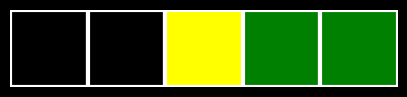

In [9]:
import matplotlib.pyplot as plt

# Define the mapping from characters to colors
color_mapping = {
    'B': 'black',
    'Y': 'yellow',
    'G': 'green'
}

# Input string
input_string = "BBYGG"

# Initialize the plot
fig, ax = plt.subplots(figsize=(len(input_string), 1))

# Loop through each character in the string and create a colored rectangle with a border
for i, char in enumerate(input_string):
    color = color_mapping.get(char, 'white')  # Default to white if character is not recognized
    rect = plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='white', linewidth=3)
    ax.add_patch(rect)

# Set the limits and remove axes
ax.set_xlim(0, len(input_string))
ax.set_ylim(0, 1)
ax.axis('off')

# Show the plot
plt.show()
